In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(trainX,trainY),(testX,testY) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


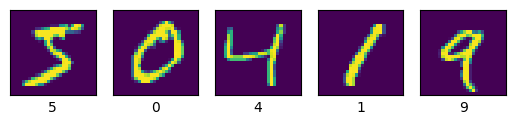

In [3]:
def plot(x,y,i):
  plt.imshow(x[i])
  plt.xlabel(y[i])
  plt.xticks([])
  plt.yticks([])
for j in range(5):
   plt.subplot(1,5,j+1)
   plot(trainX,trainY,j)

In [4]:
trainX = (trainX - trainX.min())/(trainX.max() - trainX.min())
testX = (testX - testX.min())/(testX.max() - testX.min())

In [9]:
def ANN(x,y,ep):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(100,input_shape=(28*28,),activation='relu'),
      tf.keras.layers.Dense(80,activation='relu'),
      tf.keras.layers.Dense(50,activation='relu'),
      tf.keras.layers.Dense(10,activation='softmax')
    ])

    model.compile(
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy'],
      optimizer = 'adam'
    )
    model.fit(x,y,epochs = ep,validation_split = 0.2)
    return model

In [11]:
model_ann = ANN(trainX.reshape(60000,28*28),trainY,10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8612 - loss: 0.4834 - val_accuracy: 0.9549 - val_loss: 0.1491
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9649 - loss: 0.1187 - val_accuracy: 0.9643 - val_loss: 0.1183
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9748 - loss: 0.0830 - val_accuracy: 0.9699 - val_loss: 0.1044
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9799 - loss: 0.0625 - val_accuracy: 0.9736 - val_loss: 0.0902
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9857 - loss: 0.0466 - val_accuracy: 0.9724 - val_loss: 0.1004
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9730 - val_loss: 0.0997
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9891 - loss: 0.0325 - val_accuracy: 0.9733 - val_loss: 0.1025
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9910 - loss: 0.0275 - 

In [7]:
from sklearn.metrics import classification_report

In [14]:
model_ann.evaluate(testX.reshape(10000,28*28),testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9749 - loss: 0.1097


[0.0991811454296112, 0.977400004863739]

In [27]:
c = model_ann.predict(testX.reshape(10000,28*28))
predictions = np.array([np.argmax(c[i]) for i in range(10000)])
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [71]:
def CNN(x,y,ep):
  model = tf.keras.Sequential([
      # Input Shape is 28 x 28 x 1 , the 60000 samples are handled automatically
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(filters=30,kernel_size=(4,4),padding='same',activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(filters=20,kernel_size=(4,4),padding='same',activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'softmax')
  ])

  model.compile(
      metrics = ['accuracy'],
      loss = 'sparse_categorical_crossentropy',
      optimizer = 'adam'
  )

  model.fit(x,y,epochs=ep,validation_split = 0.2)
  return model

# Convolutional Neural Network needs an additional dimension to specify the channel . In this specific case , it is grayscale and hence , channel = 1

In [72]:
model_cnn = CNN(trainX.reshape(60000,28,28,1),trainY,10)   #Additional 1 is for channel

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8821 - loss: 0.3886 - val_accuracy: 0.9756 - val_loss: 0.0781
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0608 - val_accuracy: 0.9855 - val_loss: 0.0474
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0387 - val_accuracy: 0.9871 - val_loss: 0.0450
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9872 - val_loss: 0.0389
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9885 - val_loss: 0.0421
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9950 - loss: 0.0157 - val_accuracy: 0.9875 - val_loss: 0.0415
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9874 - val_loss: 0.0437
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9954 - loss: 0.0130 - 

In [76]:
model_cnn.evaluate(testX.reshape(10000,28,28,1),testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9861 - loss: 0.0519


[0.042605798691511154, 0.9890999794006348]

# **Classification report for ANN**

In [30]:
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Classification Report for CNN**

In [77]:
c = model_cnn.predict(testX.reshape(10000,28,28,1))
predictions = np.array([np.argmax(c[i]) for i in range(10000)])
print(classification_report(testY,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.96      0.98       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

